In [126]:
# Initialize the random seed and load the data
import random
import pandas as pd

# Initialize the random seed
random.seed(16091384)

# Loading the data
data = pd.read_csv('/Users/cassie/Desktop/Spring 2024/cs473/Capstone/Classification/musicData.csv')

# Check basic information about the dataset
print(data.head())


   instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.2

In [127]:
import pandas as pd

# Change "?" in tempo into "-1"
data['tempo'] = data['tempo'].replace('?', -1.0)

# Convert 'tempo' to numeric type, ensuring all operations treat it as a number
data['tempo'] = pd.to_numeric(data['tempo'])


In [128]:
# Remove missing values
# Check for any missing values in the dataset
print(data.isnull().sum())

# Remove rows with missing values
data = data.dropna()

# Check basic information about the dataset
print(data.info())

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumental

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Initialize empty lists to hold the split data
train_frames = []
test_frames = []

# Iterate over each genre to create stratified splits
for genre, group in data.groupby('music_genre'):
    # Ensure there are at least 500 songs; if not, handle this case appropriately
    if len(group) >= 500:
        train_group, test_group = train_test_split(group, test_size=500, random_state=16091384)
    else:
        print(f"Not enough data for genre: {genre}. Using all available songs for testing.")
        train_group, test_group = pd.DataFrame(), group  # Adjust as needed for your use case
    
    # Append the splits to their respective lists
    train_frames.append(train_group)
    test_frames.append(test_group)

# Concatenate all the frames to form the full training and testing sets
train_data = pd.concat(train_frames)
test_data = pd.concat(test_frames)

# Separate features and target variable for both training and testing data
X_train = train_data.drop('music_genre', axis=1)  # Drop the target column to isolate features
y_train = train_data['music_genre']  # Target column for training
X_test = test_data.drop('music_genre', axis=1)  # Drop the target column to isolate features
y_test = test_data['music_genre']  # Target column for testing

# Verify the sizes
print(f"Training data size: {train_data.shape}")
print(f"Testing data size: {test_data.shape}")

# Check basic information about the dataset
print(test_data.head())

Training data size: (45000, 18)
Testing data size: (5000, 18)
       instance_id      artist_name                  track_name  popularity  \
18502      32119.0       Remo Drive                  Name Brand        41.0   
17981      23255.0  LCD Soundsystem                        Home        52.0   
17050      66162.0              XTC  Dear God - Remastered 2001        50.0   
16470      72143.0      Frank Ocean                  Crack Rock        55.0   
16299      81072.0   Phosphorescent                     Sugaree        51.0   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
18502       0.00141         0.588     317116.0   0.807          0.000010  F#   
17981       0.04620         0.752     473333.0   0.844          0.131000   A   
17050       0.09790         0.577     219507.0   0.464          0.000001   G   
16470       0.08840         0.564     224147.0   0.738          0.000000   F   
16299       0.01260         0.304     299720.0   0.883         

In [130]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply encoding to train and test sets
categorical_columns = ['key', 'mode']
for column in categorical_columns:
    le.fit(train_data[column])  # Fit on training data
    train_data[column] = le.transform(train_data[column])  # Transform training data
    test_data[column] = le.transform(test_data[column])  # Transform testing data using the same encoder

# Encoding the 'genre' target variable
train_data['genre'] = le.fit_transform(train_data['music_genre'])
test_data['genre'] = le.transform(test_data['music_genre'])
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [131]:
print("Unique keys:", test_data['key'].unique())
print("Unique modes:", test_data['mode'].unique())
print("Unique modes:", test_data['music_genre'].unique())
# Check basic information about the dataset
print(test_data.head())
# Key ranges from 0 to 11, from A to G#
# The mode takes 0 or 1
# minor = 1

Unique keys: [ 9  0 10  8  7  5  3  4  2 11  6  1]
Unique modes: [1 0]
Unique modes: ['Alternative' 'Anime' 'Blues' 'Classical' 'Country' 'Electronic'
 'Hip-Hop' 'Jazz' 'Rap' 'Rock']
       instance_id      artist_name                  track_name  popularity  \
18502      32119.0       Remo Drive                  Name Brand        41.0   
17981      23255.0  LCD Soundsystem                        Home        52.0   
17050      66162.0              XTC  Dear God - Remastered 2001        50.0   
16470      72143.0      Frank Ocean                  Crack Rock        55.0   
16299      81072.0   Phosphorescent                     Sugaree        51.0   

       acousticness  danceability  duration_ms  energy  instrumentalness  key  \
18502       0.00141         0.588     317116.0   0.807          0.000010    9   
17981       0.04620         0.752     473333.0   0.844          0.131000    0   
17050       0.09790         0.577     219507.0   0.464          0.000001   10   
16470       0.0884

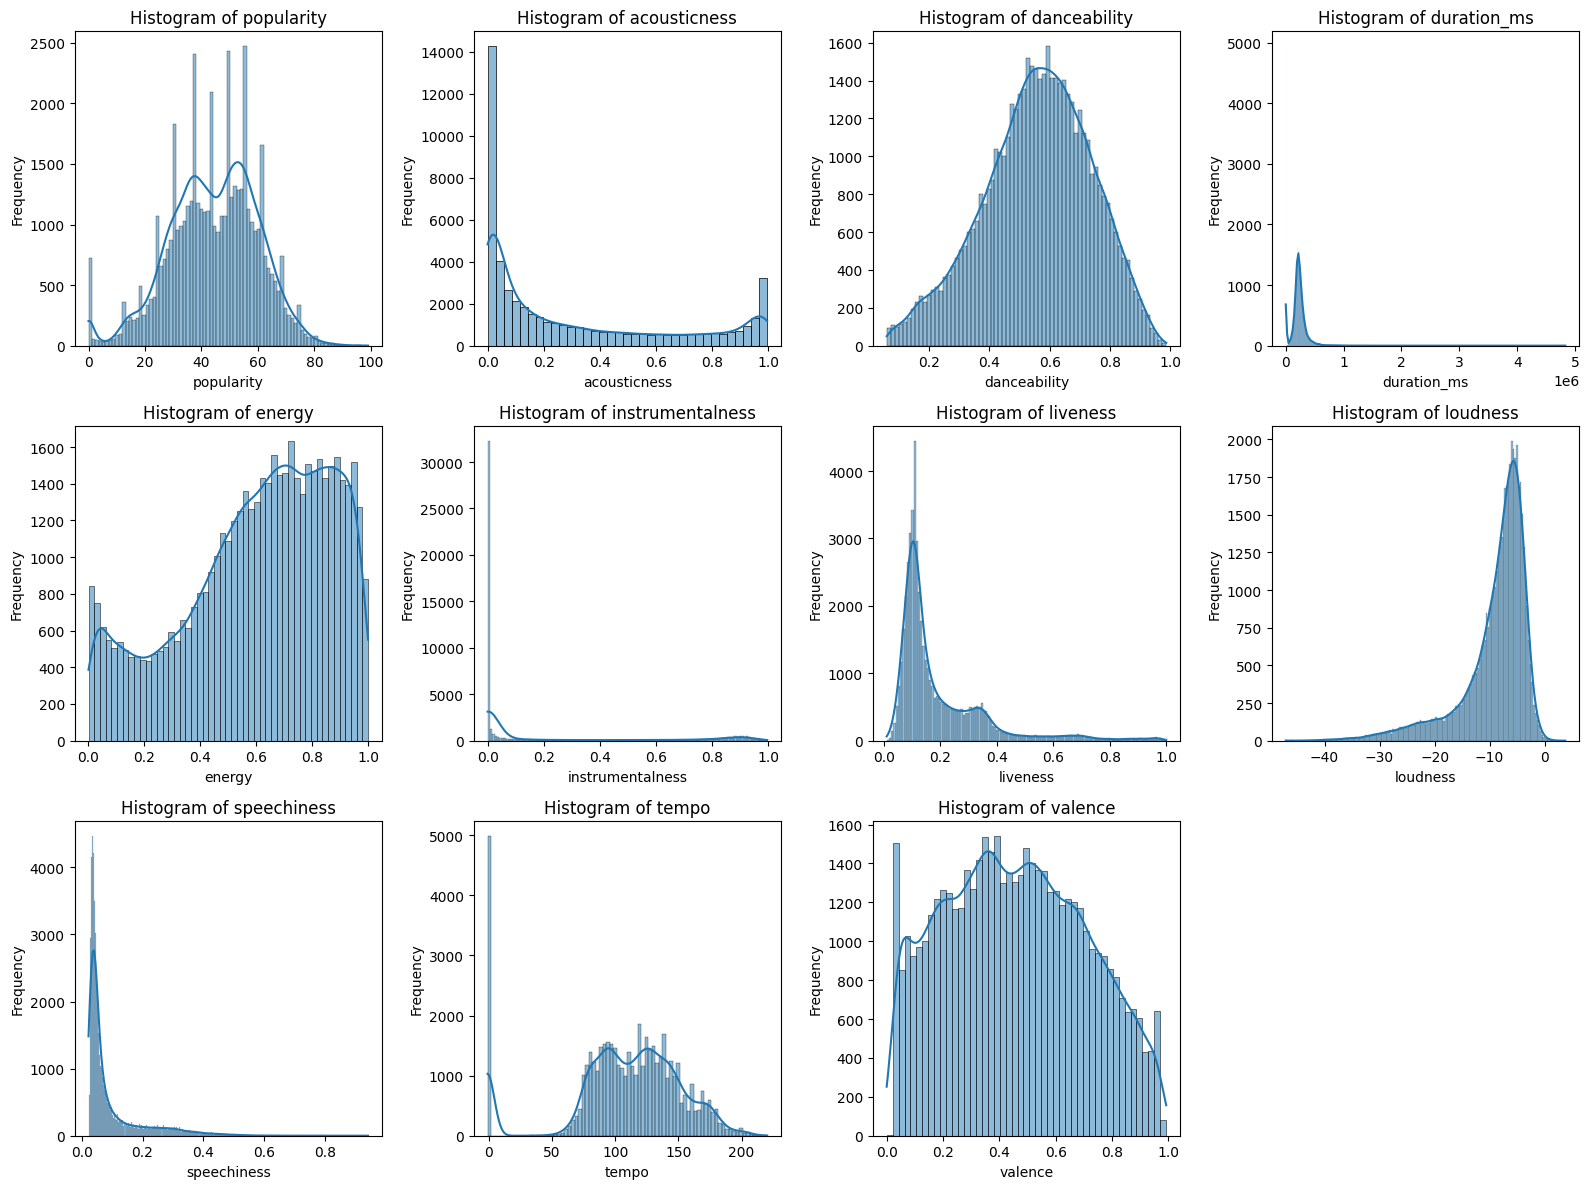

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df, features):
    # Set up the figure size dynamically
    plt.figure(figsize=(16, 12))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 4, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# List of features including 'instrumentality' and others
numerical_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
                      'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Call the function with the dataframe and the list of features
plot_histograms(data, numerical_features)

In [133]:
# Normalize the features
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Fit on training data and transform both train and test data
train_data[numerical_features] = standard_scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = standard_scaler.transform(test_data[numerical_features])

# Check the first few rows to see the effect of normalization
print(train_data.head())


       instance_id         artist_name                      track_name  \
15498      73078.0             Flyleaf                   There For You   
17137      56745.0   Cultura Profética                        De Antes   
19816      84912.0        Foo Fighters                          Aurora   
17078      22665.0          Kali Uchis                    Ridin' Round   
16867      45870.0  Coheed and Cambria  The Pavilion (A Long Way Back)   

       popularity  acousticness  danceability  duration_ms    energy  \
15498   -0.206979     -0.849883     -0.901957    -0.413784  0.024362   
17137    0.500498     -0.260441      1.011464     0.644524  0.274020   
19816    0.307550     -0.884700      0.155460     0.989678  0.977600   
17078   -0.014031     -0.181380      1.817114    -0.177487 -0.073987   
16867    0.050285     -0.894597     -1.780340     0.696096  1.329390   

       instrumentalness  key  liveness  loudness  mode  speechiness     tempo  \
15498         -0.557508   10 -0.438505  0

Number of components to retain according to Kaiser criterion: 3


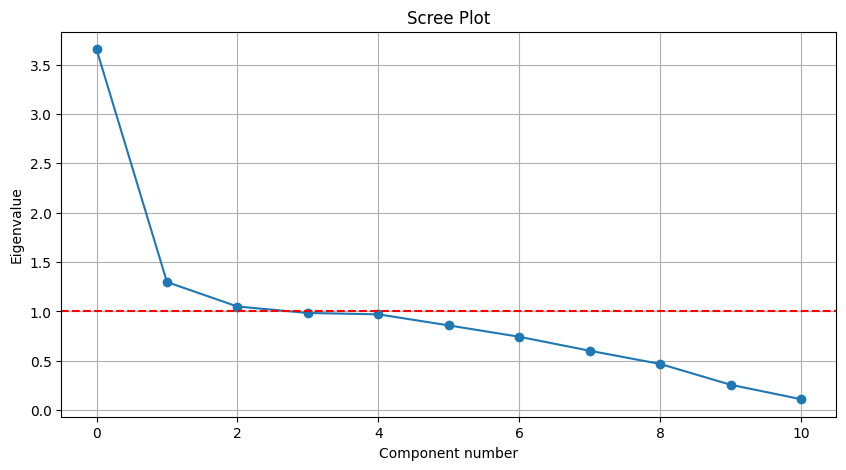

In [134]:
# Dimensionality reduction and clustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA without reducing dimensionality to find all eigenvalues
pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(train_data[numerical_features])

# Eigenvalues can be found in 'explained_variance_' attribute
eigenvalues = pca_full.explained_variance_

# Applying the Kaiser criterion: retain only components with eigenvalues > 1
n_components_kaiser = sum(eigenvalues > 1)
print("Number of components to retain according to Kaiser criterion:", n_components_kaiser)

# Redo PCA with the selected number of components
pca_kaiser = PCA(n_components=n_components_kaiser)
X_train_pca = pca_kaiser.fit_transform(train_data[numerical_features])
X_test_pca = pca_kaiser.transform(test_data[numerical_features])

# Plotting eigenvalues
plt.figure(figsize=(10, 5))
plt.plot(eigenvalues, 'o-')
plt.title('Scree Plot')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

/var/folders/tj/_dz_p0413sv974c2s87h3v5r0000gn/T/ipykernel_31490/1124669221.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(genre_labels))


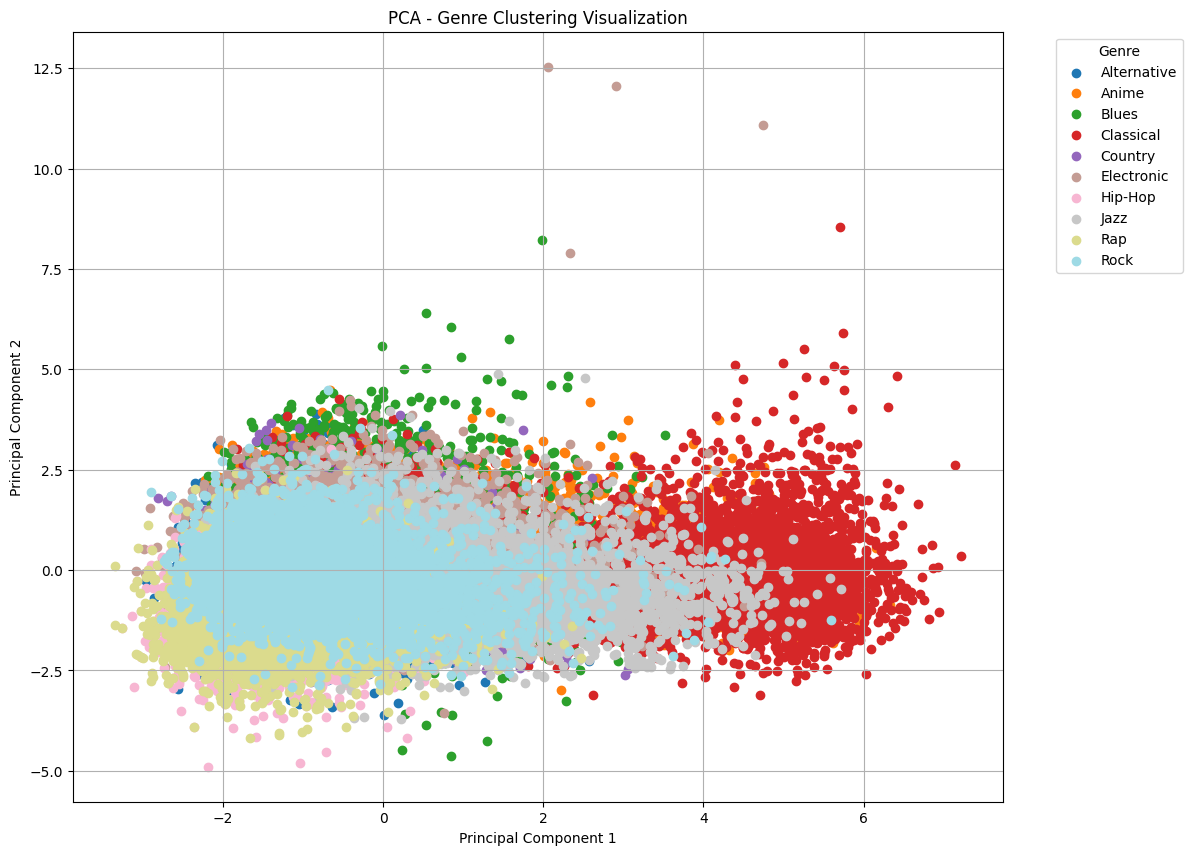

In [135]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Concatenate training and testing data for complete visualization
X_combined = np.vstack((X_train_pca, X_test_pca))
y_combined = np.concatenate((y_train, y_test))

# Color mapping for genres
genre_labels = np.unique(y_combined)
colors = plt.cm.get_cmap('tab20', len(genre_labels))

# Create a scatter plot of the first two principal components
plt.figure(figsize=(12, 10))
for i, genre in enumerate(genre_labels):
    plt.scatter(X_combined[y_combined == genre, 0], X_combined[y_combined == genre, 1], color=colors(i), label=le.inverse_transform([genre])[0])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Genre Clustering Visualization')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


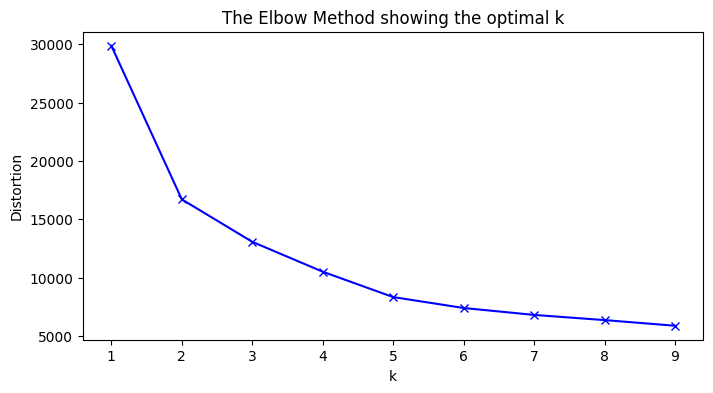

In [136]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_pca is the PCA-reduced data
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=16091384)
    kmeans.fit(X_test_pca)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [137]:
import numpy as np
from sklearn.cluster import KMeans

# Apply KMeans clustering to the PCA-reduced data
kmeans = KMeans(n_clusters=2, random_state=16091384)
train_clusters = kmeans.fit_predict(X_train_pca)
test_clusters = kmeans.predict(X_test_pca)

# Append cluster labels to your PCA data
X_train_final = np.column_stack((X_train_pca, train_clusters))
X_test_final = np.column_stack((X_test_pca, test_clusters))

In [138]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Encode the target variable numerically if not already done
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encoding y_train
y_test_encoded = label_encoder.transform(y_test)        # Encoding y_test using the same encoder

# Initialize SVM with probability estimation enabled
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=16091384)
svm_classifier.fit(X_train_final, y_train_encoded)  # Use numerically encoded labels for training

# Predict class labels on the test set for evaluation metrics
svm_predictions = svm_classifier.predict(X_test_final)

# Evaluate the classifier with actual class labels
accuracy = accuracy_score(y_test_encoded, svm_predictions)
print("Classification Accuracy:", accuracy)

# Ensure target names are formatted correctly
target_names = [str(name) for name in label_encoder.classes_]

print(classification_report(y_test_encoded, svm_predictions, target_names=target_names))

# Predict probabilities on the test set for ROC AUC calculation
prob_predictions = svm_classifier.predict_proba(X_test_final)

# Calculate ROC AUC Score using the encoded labels and predicted probabilities
roc_auc = roc_auc_score(y_test_encoded, prob_predictions, multi_class='ovr')  # multi_class='ovr' for One-vs-Rest approach
print("ROC AUC Score:", roc_auc)


Classification Accuracy: 0.3734
              precision    recall  f1-score   support

           0       0.23      0.12      0.16       500
           1       0.46      0.47      0.46       500
           2       0.35      0.18      0.24       500
           3       0.75      0.83      0.79       500
           4       0.28      0.33      0.30       500
           5       0.21      0.18      0.19       500
           6       0.41      0.71      0.52       500
           7       0.31      0.37      0.34       500
           8       0.34      0.11      0.17       500
           9       0.28      0.44      0.34       500

    accuracy                           0.37      5000
   macro avg       0.36      0.37      0.35      5000
weighted avg       0.36      0.37      0.35      5000

ROC AUC Score: 0.8280511111111111


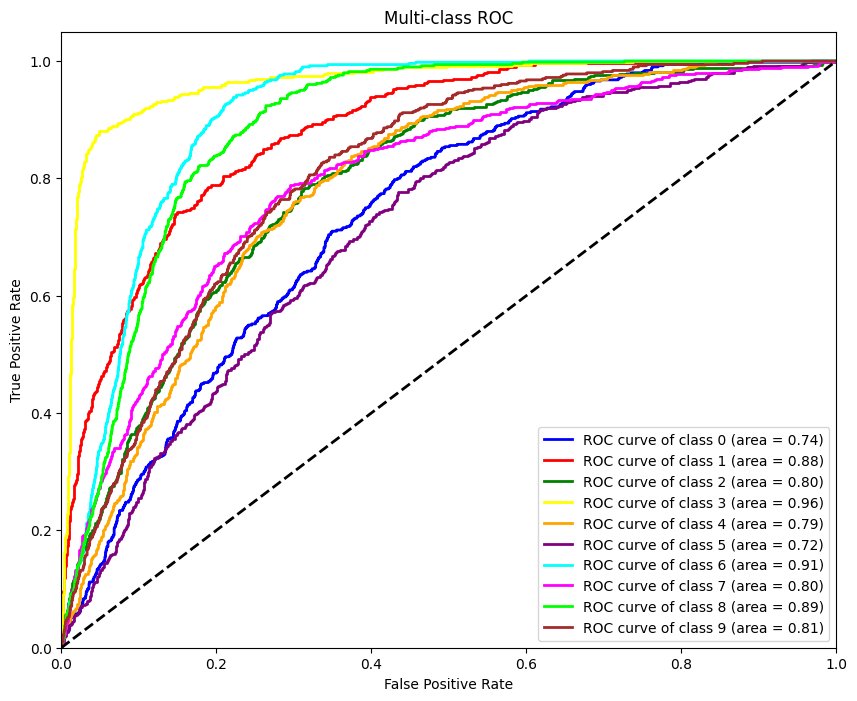

In [139]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output for multi-class ROC analysis
y_bin = label_binarize(y_test, classes=label_encoder.classes_)
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], prob_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


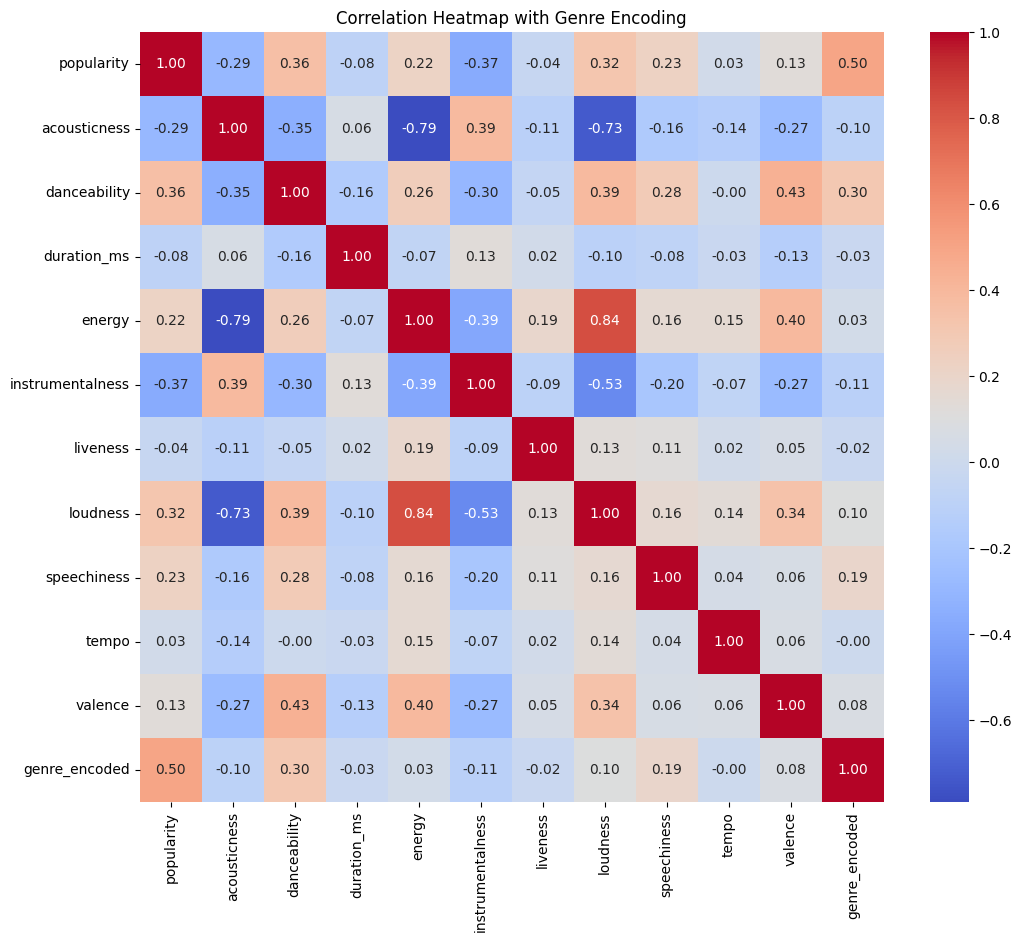

In [140]:
## Extra Credit
import seaborn as sns
import matplotlib.pyplot as plt

# Encode genres numerically if not already done
train_data['genre_encoded'] = label_encoder.fit_transform(train_data['music_genre'])

# Calculate the correlation matrix including the genre
correlation_matrix = train_data[numerical_features + ['genre_encoded']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Genre Encoding')
plt.show()
